In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from random import shuffle
%matplotlib inline

In [2]:
df = pd.read_hdf("bob_ns_response_all_images.h5")

In [3]:
df["area"].unique()

array([u'VISal', u'VISam', u'VISl', u'VISp', u'VISpm', u'VISrl'], dtype=object)

In [4]:
df["image"].unique()

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117], dtype=int64)

In [5]:
df_VISp = df[df.area== "VISp"]
df_VISpm = df[df.area== "VISpm"]

In [6]:
VISp_im_mean = df_VISp.groupby('image')['mean_response'].mean()
VISp_im_std = df_VISp.groupby('image')['mean_response'].std()

VISp_im_mean = VISp_im_mean.values
VISp_im_std = VISp_im_std.values
image = df["image"].unique()


df_VISp_image = pd.DataFrame({'image':image, 'mean':VISp_im_mean, 'std':VISp_im_std, 'SNR':VISp_im_mean/VISp_im_std})

cols = df_VISp_image.columns.tolist()
cols = ['image','SNR','mean','std']
#cols = cols[-1:] + cols[:-1]
df_VISp_image = df_VISp_image[cols] 
# sorted_VISpimage = df_VISp_image.sort_values(by=['mean','std'],ascending=[0, 0])
sorted_VISpimage = df_VISp_image.sort_values(by=['SNR'],ascending=[0])

In [7]:
VISpm_im_mean = df_VISpm.groupby('image')['mean_response'].mean()
VISpm_im_std = df_VISpm.groupby('image')['mean_response'].std()

VISpm_im_mean = VISpm_im_mean.values
VISpm_im_std = VISpm_im_std.values
image = df["image"].unique()


df_VISpm_image = pd.DataFrame({'image':image, 'mean':VISpm_im_mean, 'std':VISpm_im_std, 'SNR':VISpm_im_mean/VISpm_im_std})

cols = df_VISpm_image.columns.tolist()
cols = ['image','SNR','mean','std']
#cols = cols[-1:] + cols[:-1]
df_VISpm_image = df_VISpm_image[cols] 
# sorted_VISpimage = df_VISp_image.sort_values(by=['mean','std'],ascending=[0, 0])
sorted_VISpmimage = df_VISpm_image.sort_values(by=['SNR'],ascending=[0])

In [23]:
n_top = 119
top_VISp = np.array(sorted_VISpimage.image[0:n_top:1])
top_VISpm = np.array(sorted_VISpmimage.image[0:n_top:1])

top_VISp

array([  9,  29,  23,  42,  71, 103,   8,  78,   3,  74,  65, 101,  22,
        19,  98,  92,  13,   6,  41,  68,  94,  45, 100,  10,  14,  97,
         1,  93,  84,  82,  53, 115,  52,  44,  16,  35,  55,  32,  51,
        96, 114,   7,  39,  17,  89, 110,  26, 112,  40,  49,  80,  48,
       111, 117,  18,  15,  63,  27,  54,  87,  91, 109,  77,  86, 105,
        90,  28,  66,  12,  11,  64,  69,  95,  79,  75, 104, 102,  85,
        83,  34, 107,   4,   5,  81,  67,  58,  33,  57,  31,  62,  24,
        43,  88,  25,  47,  60,  70,  46,  38,  76,  50,  99, 106, 108,
       113,   2,  21,  37, 116,  20,  72,   0,  61,  -1,  73,  59,  56,
        36,  30], dtype=int64)

In [8]:
sortedimages_VISp = np.array(sorted_VISpimage.image)
sortedimages_VISpm = np.array(sorted_VISpmimage.image)

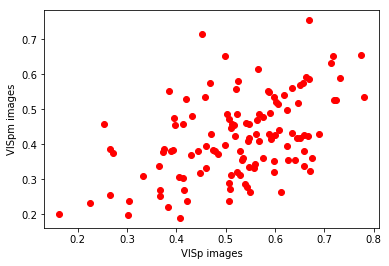

In [9]:
f = plt.figure()
plt.plot(df_VISp_image.SNR,df_VISpm_image.SNR,'ro')
plt.xlabel('VISp images')
plt.ylabel('VISpm images')
#plt.title('r=')
plt.show()

In [10]:
len(list(set(sortedimages_VISp[0:63]).intersection(sortedimages_VISpm[0:63])))

42

In [11]:
top_images = list(set(sortedimages_VISp[0:63]).intersection(sortedimages_VISpm[0:63]))

print top_images

[6, 7, 8, 9, 10, 13, 14, 15, 17, 19, 22, 23, 26, 27, 29, 32, 35, 40, 41, 42, 44, 45, 51, 52, 53, 65, 68, 71, 78, 84, 89, 93, 94, 96, 101, 103, 110, 111, 112, 114, 115, 117]


In [16]:
shuffled_top_images = top_images
shuffle(shuffled_top_images)
print shuffled_top_images

[26, 115, 40, 96, 110, 17, 71, 114, 53, 84, 117, 44, 101, 29, 89, 19, 111, 23, 32, 78, 112, 41, 51, 6, 27, 68, 93, 42, 13, 35, 14, 22, 15, 8, 65, 103, 52, 45, 9, 10, 7, 94]


In [17]:
VISpm_SNR=np.zeros(42)
VISp_SNR=np.zeros(42)
for ii in range(0,42):
    VISpm_SNR[ii]=df_VISpm_image[(df_VISpm_image.image == shuffled_top_images[ii])].SNR
    VISp_SNR[ii]=df_VISp_image[(df_VISp_image.image == shuffled_top_images[ii])].SNR

In [18]:
images42 = pd.DataFrame(np.array(shuffled_top_images),columns=['image'])

images42['VISpm_SNR']=VISpm_SNR
images42['VISp_SNR']=VISp_SNR

images42

,image,VISpm_SNR,VISp_SNR
0,26,0.615421,0.564734
1,115,0.516522,0.606559
2,40,0.429310,0.561129
3,96,0.429554,0.588223
4,110,0.486679,0.566315
5,17,0.478338,0.575729
6,71,0.527101,0.718809
7,114,0.550838,0.588170
8,53,0.441465,0.607666
9,84,0.541663,0.618346


In [133]:
images42.to_excel('shuffled_selected_images.xls')

In [75]:
#################### To view the images ###############



from allensdk.core.brain_observatory_cache import BrainObservatoryCache
boc = BrainObservatoryCache(manifest_file='boc/manifest.json')
data_set = boc.get_ophys_experiment_data(501940850)

def plot_stimulus_table(stim_table, title):
    fstart = stim_table.start.min()
    fend = stim_table.end.max()
    
    fig = plt.figure(figsize=(15,1))
    ax = fig.gca()
    for i, trial in stim_table.iterrows():    
        x1 = float(trial.start - fstart) / (fend - fstart)
        x2 = float(trial.end - fstart) / (fend - fstart)            
        ax.add_patch(patches.Rectangle((x1, 0.0), x2 - x1, 1.0, color='r'))
    ax.set_xticks((0,1))
    ax.set_xticklabels((fstart, fend))
    ax.set_yticks(())
    ax.set_title(title)
    ax.set_xlabel("frames")

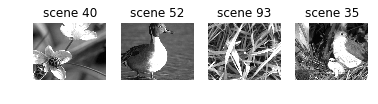

In [151]:
data_set = boc.get_ophys_experiment_data(501498760)

scene_nums = [40, 52, 93, 35] #[4, 83] 

# read in the array of images
scenes = data_set.get_stimulus_template('natural_scenes')

# display a couple of the scenes
fig, axes = plt.subplots(1,len(scene_nums))
for ax,scene in zip(axes, scene_nums):
    ax.imshow(scenes[scene,:,:], cmap='gray')
    ax.set_axis_off()
    ax.set_title('scene %d' % scene)

In [39]:
np.shape(scenes)

(118L, 918L, 1174L)